In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

1. Предварительная обработка данных

    a) Визуализация значимых признаков

In [22]:
df = pd.read_csv('all_perth_normalization.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

In [23]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 30501 rows.
The DataFrame has 11 columns.


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,DATE_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST
0,0.214824,0.333333,0.066667,0.020202,0.000539,0.187500,0.906040,0.93750,0.298026,0.049473,0.032695
1,0.131072,0.222222,0.066667,0.020202,0.000290,0.162736,0.973154,0.96875,0.443495,0.136910,0.235248
2,0.098409,0.222222,0.000000,0.010101,0.000658,0.100236,0.744966,0.84375,0.370761,0.052293,0.068107
3,0.085008,0.111111,0.000000,0.020202,0.000590,0.068396,0.570470,0.93750,0.291260,0.100243,0.064743
4,0.114322,0.333333,0.000000,0.020202,0.000405,0.153302,0.872483,0.87500,0.177929,0.055114,0.062284
...,...,...,...,...,...,...,...,...,...,...,...
30496,0.155360,0.222222,0.066667,0.020202,0.000187,0.126179,0.959732,0.87500,0.409665,0.159474,0.152562
30497,0.173786,0.333333,0.066667,0.020202,0.000339,0.154481,0.979866,0.84375,0.277728,0.069216,0.045117
30498,0.378141,0.222222,0.066667,0.010101,0.000139,0.148585,0.865772,0.96875,0.259121,0.052293,0.045894
30499,0.413735,0.333333,0.133333,0.020202,0.000231,0.287736,0.973154,0.87500,0.260813,0.041011,0.058661


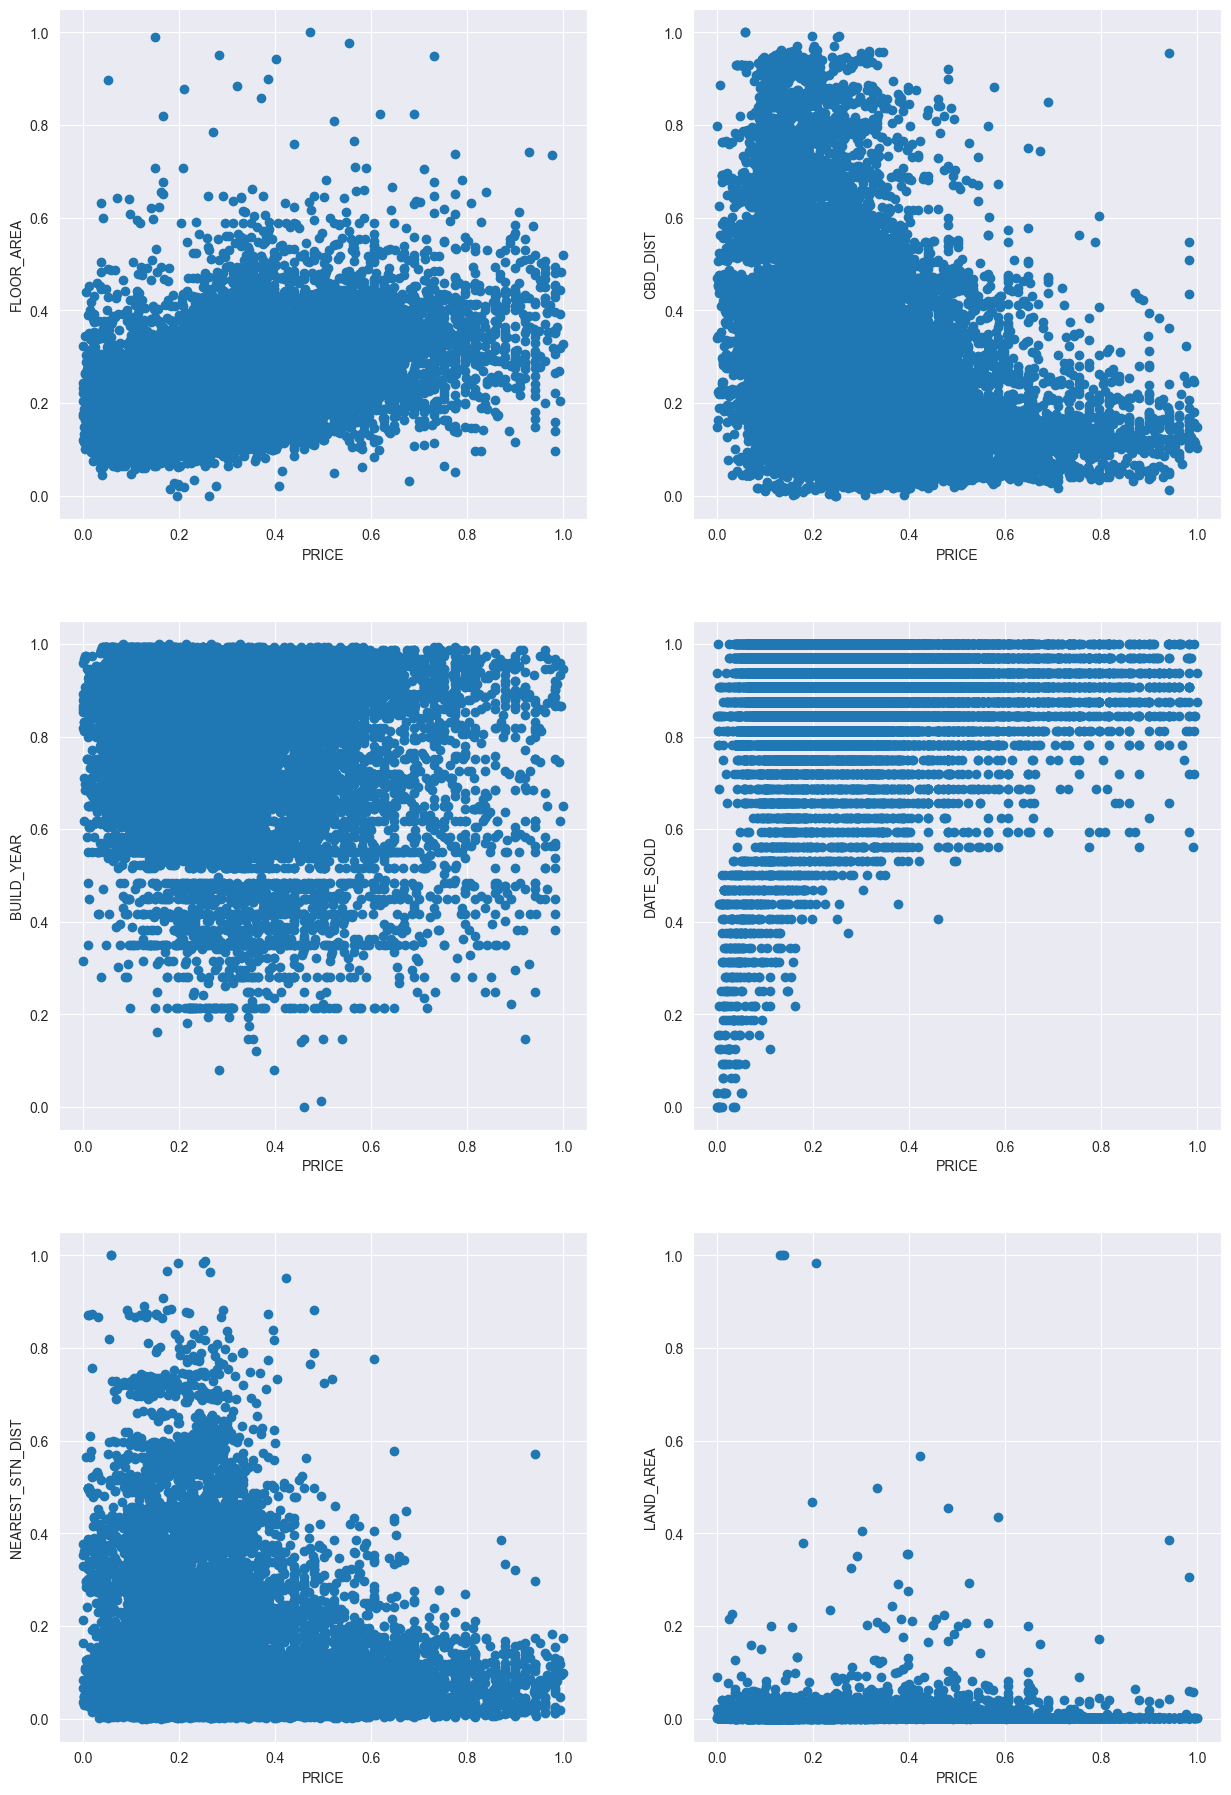

In [24]:
fig, ax = plt.subplots(3, 2, figsize=(15, 22.5))
#Первый график рассеяния: стоимость жилья и площадь помещений
ax[0][0].scatter(df["PRICE"], df["FLOOR_AREA"])
ax[0][0].set_xlabel("PRICE")
ax[0][0].set_ylabel("FLOOR_AREA")

#Второй график рассеяния: стоимость жилья и расстояние до ближайшего бизнес-центра
ax[0][1].scatter(df["PRICE"], df["CBD_DIST"])
ax[0][1].set_xlabel("PRICE")
ax[0][1].set_ylabel("CBD_DIST")

#Второй график рассеяния: стоимость жилья и год постройки
ax[1][0].scatter(df["PRICE"], df["BUILD_YEAR"])
ax[1][0].set_xlabel("PRICE")
ax[1][0].set_ylabel("BUILD_YEAR")

#Второй график рассеяния: стоимость жилья и год последней продажи
ax[1][1].scatter(df["PRICE"], df["DATE_SOLD"])
ax[1][1].set_xlabel("PRICE")
ax[1][1].set_ylabel("DATE_SOLD")

#Второй график рассеяния: стоимость жилья и расстояние до ближайшей ж/д станции
ax[2][0].scatter(df["PRICE"], df["NEAREST_STN_DIST"])
ax[2][0].set_xlabel("PRICE")
ax[2][0].set_ylabel("NEAREST_STN_DIST")

#Второй график рассеяния: стоимость жилья и размер участка
ax[2][1].scatter(df["PRICE"], df["LAND_AREA"])
ax[2][1].set_xlabel("PRICE")
ax[2][1].set_ylabel("LAND_AREA")

plt.show()

In [25]:
df = df[["PRICE","FLOOR_AREA", "LAND_AREA"]]

    b) Очистка данных

In [26]:
z = (df - df.mean()) / df.std()
df = df[(z < 3).all(axis=1)]

# Определяем выбросы с помощью квантилей
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
row_count = df.shape[0]
column_count = df.shape[1]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrame has 29102 rows.
The DataFrame has 3 columns.


Разделение датасета на тестовую и тренировочную части

In [28]:
x = df.drop('PRICE', axis=1)
y = df['PRICE']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

2. Обучение моделей и подбор параметров

    a) Параметры для подобора для модели линейной регрессии

In [29]:
param_grid = {
    'positive': [True, False],
}

In [30]:
grid_search_lr = GridSearchCV(LinearRegression(), param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(x_train, y_train)
print(grid_search_lr.best_params_)

{'positive': True}


    b) Параметры для подобора для модели регрессии лассо

In [31]:
param_grid = {
    'alpha': np.logspace(-4, 4, 9)  # Поиск значений альфа от 10^-4 до 10^4
}

In [32]:
grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=5, n_jobs=-1)
grid_search_lasso.fit(x_train, y_train)
print(grid_search_lasso.best_params_)

{'alpha': 0.0001}


    c) Параметры для подобора для модели гребневая регрессия    

In [33]:
param_grid = {
    'alpha': np.logspace(-3, 3, 7)
}

In [34]:
grid_search_ridge = GridSearchCV(Ridge(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_ridge.fit(x_train, y_train)
print(grid_search_ridge.best_params_)

{'alpha': 1.0}


3. Оценка моделей

    a) Вывод метрик

Записываем предсказания

In [35]:
y_pred_lr = grid_search_lr.predict(x_test)
y_pred_lasso = grid_search_lasso.predict(x_test)
y_pred_ridge = grid_search_ridge.predict(x_test)

Вычисляем метрику R-squared (Коэффициент детерминации)

In [36]:
linear_r2 = r2_score(y_test, y_pred_lr)
lasso_r2 = r2_score(y_test, y_pred_lasso)
ridge_r2 = r2_score(y_test, y_pred_ridge)

Выводим метрику R-squared

In [37]:
print("Linear R-squared: ", linear_r2)
print("Lasso R-squared: ", lasso_r2)
print("Ridge R-squared: ", ridge_r2)

Linear R-squared:  0.3230471595823312
Lasso R-squared:  0.32245109683413264
Ridge R-squared:  0.32284407141945315


Вычисляем среднюю квадратичную ошибку (Mean Squared Error)

In [38]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

Выводим среднюю квадратичную ошибку

In [39]:
print("Linear Regression MSE: ", mse_lr)
print("Lasso MSE: ", mse_lasso)
print("Ridge MSE: ", mse_ridge)

Linear Regression MSE:  0.010046342862309508
Lasso MSE:  0.010055188752862473
Ridge MSE:  0.010049356799461012


    b) Построение графиков

Строим графики для моделей

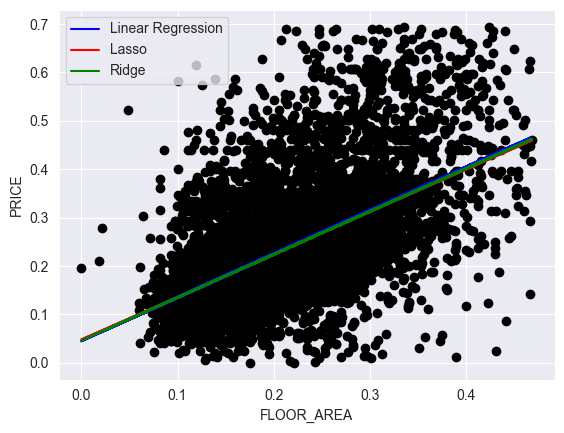

In [40]:
plt.scatter(x_test["FLOOR_AREA"], y_test, color='black')
plt.plot(x_test["FLOOR_AREA"], y_pred_lr, color='blue', label='Linear Regression')
plt.plot(x_test["FLOOR_AREA"], y_pred_lasso, color='red', label='Lasso')
plt.plot(x_test["FLOOR_AREA"], y_pred_ridge, color='green', label='Ridge')
plt.xlabel("FLOOR_AREA")
plt.ylabel("PRICE")
plt.legend()
plt.show()